# Network Archiectue Tuning of models on CIFAR-10 Dataset

In [1]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os
from matplotlib import pyplot as plt
from keras import regularizers
from keras.constraints import max_norm

Using TensorFlow backend.


In [0]:
num_classes = 10
data_augmentation = True
num_predictions = 20
# batch_size = 128
# epochs = 30

In [3]:
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

170500096/170498071 [==============================] - 2s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [0]:
x_train = x_train[0:20000]
y_train = y_train[0:20000]

In [0]:
# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

#### Model 1

In [0]:
def model1(model,batch_size,epochs):
    
        model.add(Conv2D(64, (3, 3) ,padding='same',input_shape=x_train.shape[1:]))
        model.add(Activation('relu'))
        
        model.add(Conv2D(64, (3, 3)))
        model.add(Activation('relu'))
        
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(rate = 0.25))

        model.add(Conv2D(32, (3, 3), padding='same'))
        model.add(Activation('relu'))
        
        model.add(Conv2D(32, (3, 3)))
        model.add(Activation('relu'))
        
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(rate = 0.25))

        model.add(Flatten())
        model.add(Dense(512))
        model.add(Activation('relu'))
        model.add(Dropout(rate = 0.5))
        model.add(Dense(num_classes))
        model.add(Activation('softmax'))
        
        opt = keras.optimizers.adam(lr=0.0001, decay=1e-6)
            

        # Let's train the model
        model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
        
        history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
        return history

In [0]:
tmodel1 = Sequential()
train_model1 = model1(tmodel1,128,150)

W0702 08:29:28.224858 140347210831744 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0702 08:29:28.268895 140347210831744 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0702 08:29:28.272888 140347210831744 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0702 08:29:28.359340 140347210831744 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0702 08:29:28.363212 140347210831744 deprecation_wrapp

Train on 20000 samples, validate on 10000 samples
Epoch 1/150
20000/20000 [==============================] - 327s 16ms/step - loss: 2.1452 - acc: 0.1942 - val_loss: 1.9284 - val_acc: 0.2958
Epoch 2/150
20000/20000 [==============================] - 332s 17ms/step - loss: 1.8244 - acc: 0.3329 - val_loss: 1.6791 - val_acc: 0.3958
Epoch 3/150
20000/20000 [==============================] - 329s 16ms/step - loss: 1.7025 - acc: 0.3743 - val_loss: 1.6008 - val_acc: 0.4213
Epoch 4/150
20000/20000 [==============================] - 332s 17ms/step - loss: 1.6363 - acc: 0.3971 - val_loss: 1.5236 - val_acc: 0.4472
Epoch 5/150
20000/20000 [==============================] - 329s 16ms/step - loss: 1.5724 - acc: 0.4251 - val_loss: 1.4817 - val_acc: 0.4678
Epoch 6/150
20000/20000 [==============================] - 336s 17ms/step - loss: 1.5144 - acc: 0.4459 - val_loss: 1.4261 - val_acc: 0.4864
Epoch 7/150
20000/20000 [==============================] - 334s 17ms/step - loss: 1.4705 - acc: 0.4669 - val_l

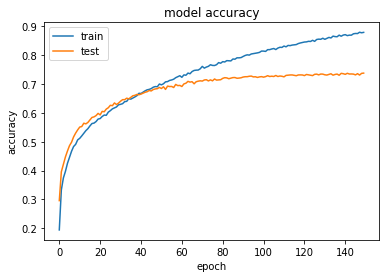

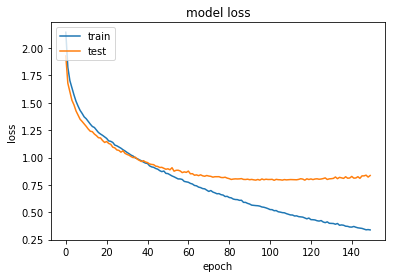

In [0]:
# summarize history for accuracy
plt.plot(train_model1.history['acc'])
plt.plot(train_model1.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(train_model1.history['loss'])
plt.plot(train_model1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### Model 2

In [0]:
def model2(model,batch_size,epochs):
    
        model.add(Conv2D(128, (3, 3) ,padding='same',input_shape=x_train.shape[1:]))
        model.add(Activation('relu'))
        
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(rate = 0.25))
        
        model.add(Conv2D(64, (3, 3)))
        model.add(Activation('relu'))
   
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(rate = 0.25))

        model.add(Conv2D(32, (3, 3), padding='same'))
        model.add(Activation('relu'))
        
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(rate = 0.25))

        model.add(Flatten())
        model.add(Dense(1024))
        model.add(Activation('relu'))
        model.add(Dense(512))
        model.add(Activation('relu'))
        model.add(Dropout(rate = 0.5))
        model.add(Dense(num_classes))
        model.add(Activation('softmax'))
        
        opt = keras.optimizers.adam(lr=0.0001, decay=1e-6)
            

        # Let's train the model
        model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
        
        history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
        return history

In [0]:
tmodel2 = Sequential()
train_model2 = model2(tmodel2,128,50)

W0703 05:23:21.543370 140713814325120 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0703 05:23:21.579010 140713814325120 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0703 05:23:21.586394 140713814325120 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0703 05:23:21.631334 140713814325120 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0703 05:23:21.634386 140713814325120 deprecation_wrapp

Train on 20000 samples, validate on 10000 samples
Epoch 1/50
20000/20000 [==============================] - 107s 5ms/step - loss: 2.2270 - acc: 0.1502 - val_loss: 2.0768 - val_acc: 0.2233
Epoch 2/50
20000/20000 [==============================] - 104s 5ms/step - loss: 1.9870 - acc: 0.2606 - val_loss: 1.8712 - val_acc: 0.3471
Epoch 3/50
20000/20000 [==============================] - 104s 5ms/step - loss: 1.8212 - acc: 0.3324 - val_loss: 1.7516 - val_acc: 0.3826
Epoch 4/50
20000/20000 [==============================] - 104s 5ms/step - loss: 1.7335 - acc: 0.3634 - val_loss: 1.6759 - val_acc: 0.4034
Epoch 5/50
20000/20000 [==============================] - 105s 5ms/step - loss: 1.6682 - acc: 0.3833 - val_loss: 1.6089 - val_acc: 0.4287
Epoch 6/50
20000/20000 [==============================] - 105s 5ms/step - loss: 1.6169 - acc: 0.4060 - val_loss: 1.5717 - val_acc: 0.4429
Epoch 7/50
20000/20000 [==============================] - 105s 5ms/step - loss: 1.5749 - acc: 0.4206 - val_loss: 1.5361 - 

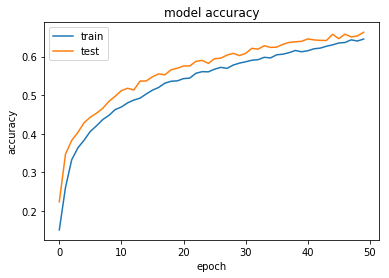

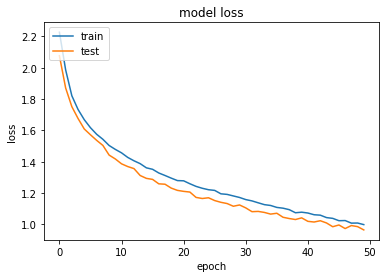

In [0]:
# summarize history for accuracy
plt.plot(train_model2.history['acc'])
plt.plot(train_model2.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(train_model2.history['loss'])
plt.plot(train_model2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### Model 3

In [0]:
def model3(model,batch_size,epochs):
    
        model.add(Conv2D(256, (3, 3) ,padding='same',input_shape=x_train.shape[1:]))
        model.add(Activation('relu'))
        
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(rate = 0.25))
        
        model.add(Conv2D(128, (3, 3)))
        model.add(Activation('relu'))
   
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(rate = 0.25))

        model.add(Conv2D(64, (3, 3), padding='same'))
        model.add(Activation('relu'))
        
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(rate = 0.25))

        model.add(Flatten())
        model.add(Dense(1024))
        model.add(Activation('relu'))
        model.add(Dense(512))
        model.add(Activation('relu'))
        model.add(Dropout(rate = 0.5))
        model.add(Dense(num_classes))
        model.add(Activation('softmax'))
        
        opt = keras.optimizers.adam(lr=0.0001, decay=1e-6)
            

        # Let's train the model
        model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
        
        history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
        return history

In [0]:
tmodel3 = Sequential()
train_model3 = model3(tmodel3,128,50)

Train on 20000 samples, validate on 10000 samples
Epoch 1/50
20000/20000 [==============================] - 274s 14ms/step - loss: 2.1614 - acc: 0.1794 - val_loss: 1.9338 - val_acc: 0.3123
Epoch 2/50
20000/20000 [==============================] - 275s 14ms/step - loss: 1.8376 - acc: 0.3256 - val_loss: 1.7129 - val_acc: 0.3894
Epoch 3/50
20000/20000 [==============================] - 275s 14ms/step - loss: 1.7040 - acc: 0.3714 - val_loss: 1.6188 - val_acc: 0.4202
Epoch 4/50
20000/20000 [==============================] - 275s 14ms/step - loss: 1.6071 - acc: 0.4084 - val_loss: 1.5028 - val_acc: 0.4600
Epoch 5/50
20000/20000 [==============================] - 274s 14ms/step - loss: 1.5228 - acc: 0.4384 - val_loss: 1.4404 - val_acc: 0.4840
Epoch 6/50
20000/20000 [==============================] - 274s 14ms/step - loss: 1.4742 - acc: 0.4591 - val_loss: 1.3931 - val_acc: 0.5033
Epoch 7/50
20000/20000 [==============================] - 275s 14ms/step - loss: 1.4262 - acc: 0.4833 - val_loss: 1.

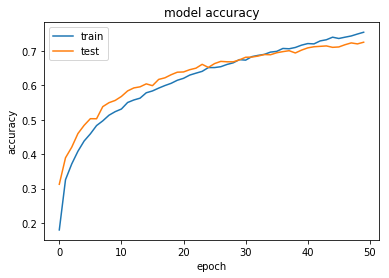

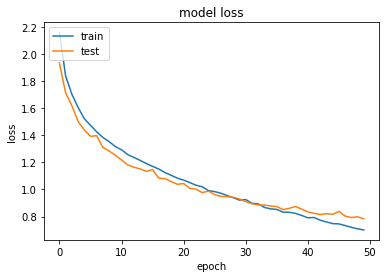

In [0]:
# summarize history for accuracy
plt.plot(train_model3.history['acc'])
plt.plot(train_model3.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(train_model3.history['loss'])
plt.plot(train_model3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### Model 4

In [0]:
def model4(model,batch_size,epochs):
    
        model.add(Conv2D(64, (3, 3) ,padding='same',input_shape=x_train.shape[1:]))
        model.add(Activation('relu'))
        
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(rate = 0.25))
        
        model.add(Conv2D(128, (3, 3)))
        model.add(Activation('relu'))
   
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(rate = 0.25))

        model.add(Conv2D(256, (3, 3), padding='same'))
        model.add(Activation('relu'))
        
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(rate = 0.25))

        model.add(Flatten())
        model.add(Dense(1024))
        model.add(Activation('relu'))
        model.add(Dense(512))
        model.add(Activation('relu'))
        model.add(Dropout(rate = 0.5))
        model.add(Dense(num_classes))
        model.add(Activation('softmax'))
        
        opt = keras.optimizers.adam(lr=0.0001, decay=1e-6)
            

        # Let's train the model
        model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
        
        history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
        return history

In [0]:
tmodel4 = Sequential()
train_model4 = model4(tmodel4,128,50)

Train on 20000 samples, validate on 10000 samples
Epoch 1/50
20000/20000 [==============================] - 134s 7ms/step - loss: 2.1717 - acc: 0.1829 - val_loss: 1.9853 - val_acc: 0.2943
Epoch 2/50
20000/20000 [==============================] - 133s 7ms/step - loss: 1.8440 - acc: 0.3195 - val_loss: 1.7486 - val_acc: 0.3784
Epoch 3/50
20000/20000 [==============================] - 135s 7ms/step - loss: 1.6795 - acc: 0.3846 - val_loss: 1.6057 - val_acc: 0.4290
Epoch 4/50
20000/20000 [==============================] - 134s 7ms/step - loss: 1.5785 - acc: 0.4186 - val_loss: 1.5355 - val_acc: 0.4605
Epoch 5/50
20000/20000 [==============================] - 134s 7ms/step - loss: 1.5147 - acc: 0.4430 - val_loss: 1.4795 - val_acc: 0.4817
Epoch 6/50
20000/20000 [==============================] - 134s 7ms/step - loss: 1.4560 - acc: 0.4742 - val_loss: 1.4555 - val_acc: 0.4841
Epoch 7/50
20000/20000 [==============================] - 133s 7ms/step - loss: 1.4043 - acc: 0.4887 - val_loss: 1.3817 - 

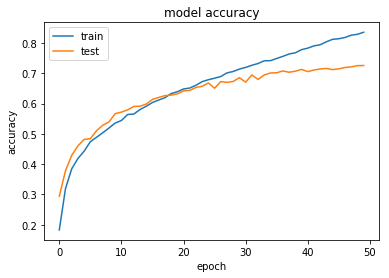

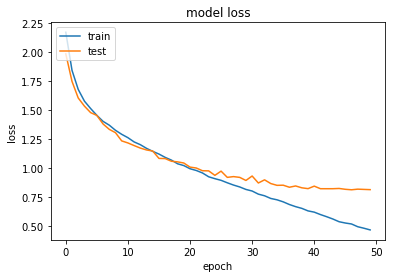

In [0]:
# summarize history for accuracy
plt.plot(train_model4.history['acc'])
plt.plot(train_model4.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(train_model4.history['loss'])
plt.plot(train_model4.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### Model 5

In [0]:
def model5(model,batch_size,epochs):
    
        model.add(Conv2D(32, (3, 3) ,padding='same',input_shape=x_train.shape[1:]))
        model.add(Activation('relu'))
        
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(rate = 0.25))
        
        model.add(Conv2D(32, (3, 3)))
        model.add(Activation('relu'))
   
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(rate = 0.25))

        model.add(Conv2D(64, (3, 3), padding='same'))
        model.add(Activation('relu'))
        
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(rate = 0.25))
        
        model.add(Conv2D(64, (3, 3), padding='same'))
        model.add(Activation('relu'))
        
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(rate = 0.25))
        

        model.add(Flatten())
        model.add(Dense(1024))
        model.add(Activation('relu'))
        model.add(Dense(512))
        model.add(Activation('relu'))
        model.add(Dropout(rate = 0.5))
        model.add(Dense(num_classes))
        model.add(Activation('softmax'))
        
        opt = keras.optimizers.adam(lr=0.0001, decay=1e-6)
            

        # Let's train the model
        model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
        
        history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
        return history

In [8]:
tmodel5 = Sequential()
train_model5 = model5(tmodel5,128,50)

W0720 09:58:51.770870 140087084058496 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0720 09:58:51.813593 140087084058496 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0720 09:58:51.821266 140087084058496 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0720 09:58:51.866656 140087084058496 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0720 09:58:51.872882 140087084058496 deprecation_wrapp

Train on 20000 samples, validate on 10000 samples
Epoch 1/50
20000/20000 [==============================] - 35s 2ms/step - loss: 2.2875 - acc: 0.1106 - val_loss: 2.2271 - val_acc: 0.1995
Epoch 2/50
20000/20000 [==============================] - 34s 2ms/step - loss: 2.1046 - acc: 0.2035 - val_loss: 2.0841 - val_acc: 0.2329
Epoch 3/50
20000/20000 [==============================] - 35s 2ms/step - loss: 2.0135 - acc: 0.2367 - val_loss: 2.0080 - val_acc: 0.2559
Epoch 4/50
20000/20000 [==============================] - 34s 2ms/step - loss: 1.9240 - acc: 0.2715 - val_loss: 1.9067 - val_acc: 0.2979
Epoch 5/50
20000/20000 [==============================] - 34s 2ms/step - loss: 1.8679 - acc: 0.2999 - val_loss: 1.8599 - val_acc: 0.3202
Epoch 6/50
20000/20000 [==============================] - 34s 2ms/step - loss: 1.8265 - acc: 0.3159 - val_loss: 1.8069 - val_acc: 0.3333
Epoch 7/50
20000/20000 [==============================] - 34s 2ms/step - loss: 1.7924 - acc: 0.3282 - val_loss: 1.7601 - val_acc

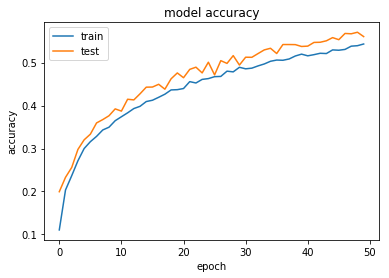

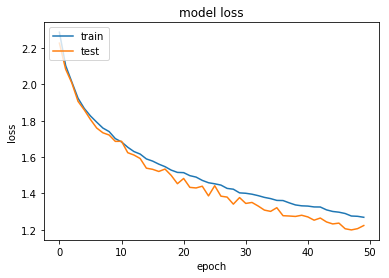

In [9]:
# summarize history for accuracy
plt.plot(train_model5.history['acc'])
plt.plot(train_model5.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(train_model5.history['loss'])
plt.plot(train_model5.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()